"Call Center Operations Optimization: A Simulation-Based Approach to Staffng, Cost, and Customer Experience"

Learning Outcomes:

By completing this project, students will be able to:

1. Understand Queueing Theory Basics

• Model reaHife service systems using MM1 and MMs queueing frameworks.

• Interpret key metrics such as utilization (p), average wait time, and system size.

2. Perform Event-Based Simulations

• Simulate customer arrival and service processes using Poisson and Exponential distributions.

• Track individual customer wait times anu queue lengths throughout an 8-hour shift.

3. Analyze Service Performance Metrics

 • Calculate and visualize:

  --> Mean wait times

  --> 95th percentile wait times  

  --> Abandonment rates

  --> Average queue lenghts

4. Compare Simulated vs. Analytical Results

• Derive analytical performance estimates using classic M/M/I formulas.

• Validate or critique assumptions by comparing them to simulated outcomes.

5. Evaluate Dynamic System Behavior

• Implement time-varying arrival rates to reflect real-world demand fluctuations (rush hours).

• Add staff breaks and observe their operational impact.

6. Model Customer Abandonment

• Simulate realistic caller behavior with a patience threshold (abandonment time).

• Analyze how inadequate staffing affects customer loss and brand experience.

7. Conduct Cost-Based Decision Making

• Formulate total cost as a combination of labor costs and customer wait costs.

• Determine the optimal number of agents to minimize total operational expense.

8. Perform Sensitivity & Risk Analysis

• Run simulations over multiple days to observe:

   --> Daily variability in wait time metrics

   --> Worst- case scenarios

• Build an appreciation for uncertainty in operations planning.

9. Think Like an Operations Manager

• Develop data-driven staffing recommendations to meet Service Level Agreements (SLAs).

• Communicate findings visually using dashboards, tables, and histograms.

What will do:

1. Model calls arriving at rate X per hour (Poisson process) and service times of l/u hours (Exponential).

2. Simulate an M/M/s queue over an 8-hour shift. tracking each callers wait time and queue length.

3. Compare simulated averages to the M/M/1 analytic formula:

  o Average customers in system L = p/(1-p)

  o Averagetime in system

4. Test staffing levels s 1-5 and choose the smallest s so that the 95th-percentile wait s <= 5 minutes.

We'll also plot the distribution of wait times and queue lengths to mimic an operations-dashboard.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

# Parameters
lmbda = 12  # average arrival rate per hour
shift_hours = 8
shift_seconds = shift_hours * 3600  # convert hours to seconds

# Generate interarrival times (Exponential distribution)
interarrival_times = np.random.exponential(scale=1/lmbda, size=1000)  # scale = 1/λ

# Compute arrival times by cumulative sum
arrival_times = np.cumsum(interarrival_times)

# Filter arrivals within the 8-hour shift
arrival_times = arrival_times[arrival_times < shift_hours]

# Total number of customers
N = len(arrival_times)

print(f"Number of arrivals in {shift_hours} hours: {N}")


Number of arrivals in 8 hours: 88


In [ ]:
import numpy as np

# Parameters
lmbda = 12         # arrival rate per hour
mu = 6             # service rate per hour
s = 3              # number of agents (servers)
shift_hours = 8
shift_seconds = shift_hours * 3600

# Step 1: Generate arrivals
interarrival_times = np.random.exponential(scale=1/lmbda, size=1000)
arrival_times = np.cumsum(interarrival_times)
arrival_times = arrival_times[arrival_times < shift_hours]
N = len(arrival_times)

# Step 2: Generate service times
service_times = np.random.exponential(scale=1/mu, size=N)

# Step 3: Set up tracking variables
next_free = np.zeros(s)        # When each agent will be next available
wait_time = np.zeros(N)        # Time each customer waits
start_service = np.zeros(N)    # When each customer starts being served
end_service = np.zeros(N)      # When each customer finishes

# Step 4: Simulate the queue (M/M/s)
for i in range(N):
    # Find the first available agent (the one who gets free earliest)
    agent_index = np.argmin(next_free)

    # Wait time is the difference between the agent's availability and arrival
    wait_time[i] = max(0, next_free[agent_index] - arrival_times[i])

    # Service starts either at arrival or when the agent becomes free
    start_service[i] = arrival_times[i] + wait_time[i]
    end_service[i] = start_service[i] + service_times[i]

    # Update agent's next availability
    next_free[agent_index] = end_service[i]


In [ ]:
print(f"Average wait time: {np.mean(wait_time)*60:.2f} minutes")
print(f"95th percentile wait time: {np.percentile(wait_time, 95)*60:.2f} minutes")


Average wait time: 4.65 minutes
95th percentile wait time: 16.78 minutes


In [ ]:
# Given:
lmbda = 12  # arrival rate per hour
mu = 15     # service rate per hour

# Convert wait_time from hours (if needed)
sim_avg_wait = np.mean(wait_time)  # in hours
sim_avg_system_time = np.mean(wait_time + service_times)

# Theoretical values
rho = lmbda / mu
L = rho / (1 - rho)
L_q = rho**2 / (1 - rho)
W = 1 / (mu - lmbda)
W_q = lmbda / (mu * (mu - lmbda))

# Print results
print("\n--- Simulated vs. Theoretical (M/M/1) ---")
print(f"Simulated Avg Wait Time (Wq): {sim_avg_wait*60:.2f} min")
print(f"Analytical Avg Wait Time (Wq): {W_q*60:.2f} min\n")

print(f"Simulated Avg Time in System (W): {sim_avg_system_time*60:.2f} min")
print(f"Analytical Avg Time in System (W): {W*60:.2f} min\n")

print(f"Simulated Avg # in Queue (Lq): {(sim_avg_wait * lmbda):.2f}")
print(f"Analytical Avg # in Queue (Lq): {L_q:.2f}\n")

print(f"Simulated Avg # in System (L): {(sim_avg_system_time * lmbda):.2f}")
print(f"Analytical Avg # in System (L): {L:.2f}")



--- Simulated vs. Theoretical (M/M/1) ---
Simulated Avg Wait Time (Wq): 4.65 min
Analytical Avg Wait Time (Wq): 16.00 min

Simulated Avg Time in System (W): 15.01 min
Analytical Avg Time in System (W): 20.00 min

Simulated Avg # in Queue (Lq): 0.93
Analytical Avg # in Queue (Lq): 3.20

Simulated Avg # in System (L): 3.00
Analytical Avg # in System (L): 4.00


In [ ]:
import numpy as np

# Parameters
lmbda = 12         # arrival rate per hour
mu = 6             # service rate per hour
shift_hours = 8
max_agents = 5
wait_threshold = 5 / 60  # 5 minutes in hours

# Generate arrivals once for fairness across tests
interarrival_times = np.random.exponential(1/lmbda, size=5000)
arrival_times = np.cumsum(interarrival_times)
arrival_times = arrival_times[arrival_times < shift_hours]
N = len(arrival_times)

# Generate service times once for fairness
service_times_master = np.random.exponential(1/mu, size=N)

# Store results
results = []

# Test agent levels from 1 to 5
for s in range(1, max_agents + 1):
    next_free = np.zeros(s)
    wait_time = np.zeros(N)

    for i in range(N):
        service_times = service_times_master  # re-use
        agent = np.argmin(next_free)
        wait_time[i] = max(0, next_free[agent] - arrival_times[i])
        start_service = arrival_times[i] + wait_time[i]
        end_service = start_service + service_times[i]
        next_free[agent] = end_service

    wait_95 = np.percentile(wait_time, 95) * 60  # in minutes
    avg_wait = np.mean(wait_time) * 60  # in minutes

    results.append((s, wait_95, avg_wait))

# Display results
print("\nAgents | 95th %ile Wait (min) | Avg Wait (min)")
print("-----------------------------------------------")
for s, w95, avg in results:
    print(f"{s:^7} | {w95:^21.2f} | {avg:^15.2f}")

# Find optimal number of agents
optimal = next((s for s, w95, _ in results if w95 <= 5), None)
if optimal:
    print(f"\n✅ Minimum agents needed to keep 95th percentile wait ≤ 5 min: {optimal}")
else:
    print("\n❌ None of the staffing levels met the 5-minute SLA.")



Agents | 95th %ile Wait (min) | Avg Wait (min)
-----------------------------------------------
   1    |        559.39         |     336.49     
   2    |         95.26         |      50.46     
   3    |         13.84         |      3.82      
   4    |         7.21          |      0.92      
   5    |         2.41          |      0.31      

✅ Minimum agents needed to keep 95th percentile wait ≤ 5 min: 5


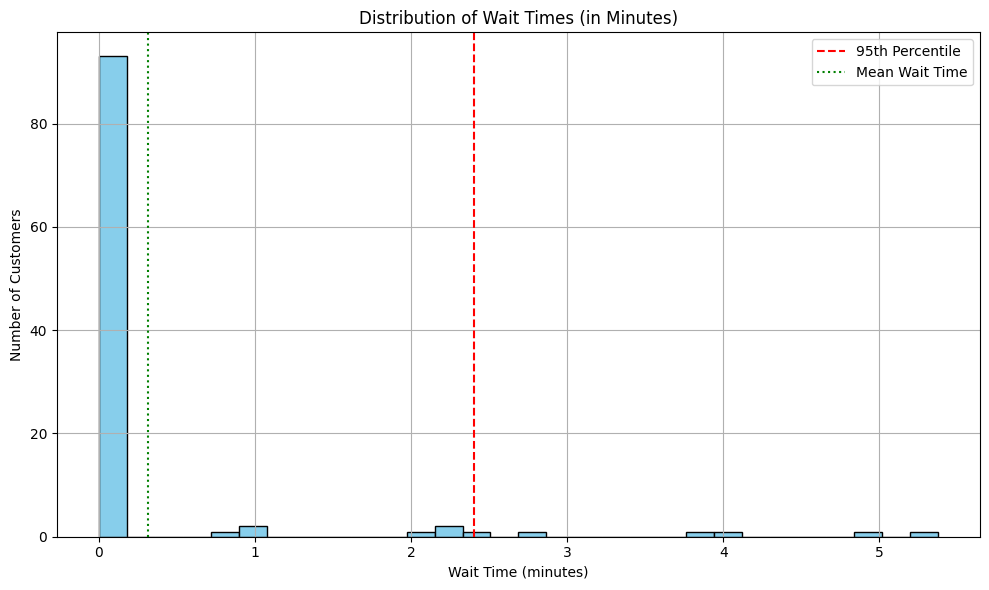

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert wait times to minutes
wait_time_minutes = wait_time * 60

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(wait_time_minutes, bins=30, color='skyblue', edgecolor='black')
plt.axvline(np.percentile(wait_time_minutes, 95), color='red', linestyle='dashed', label='95th Percentile')
plt.axvline(np.mean(wait_time_minutes), color='green', linestyle='dotted', label='Mean Wait Time')
plt.title('Distribution of Wait Times (in Minutes)')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

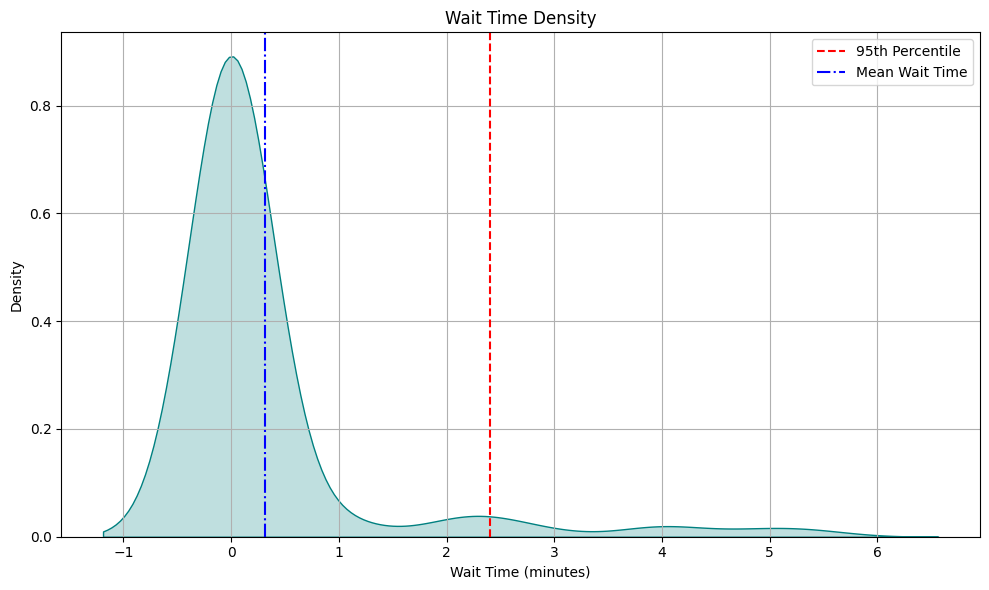

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(wait_time_minutes, fill=True, color='teal')
plt.axvline(np.percentile(wait_time_minutes, 95), color='red', linestyle='--', label='95th Percentile')
plt.axvline(np.mean(wait_time_minutes), color='blue', linestyle='-.', label='Mean Wait Time')
plt.title('Wait Time Density')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def simulate_queue(s):
    N = 1000
    arrival_rate = 10
    service_rate = 12
    shift_hours = 8

    arrivals = np.cumsum(np.random.exponential(1 / arrival_rate, size=N))
    arrivals = arrivals[arrivals < shift_hours]
    N = len(arrivals)
    service_times = np.random.exponential(1 / service_rate, size=N)

    next_free = np.zeros(s)
    wait_times = np.zeros(N)

    for i in range(N):
        agent = np.argmin(next_free)
        wait_times[i] = max(0, next_free[agent] - arrivals[i])
        start = arrivals[i] + wait_times[i]
        next_free[agent] = start + service_times[i]

    return wait_times, None


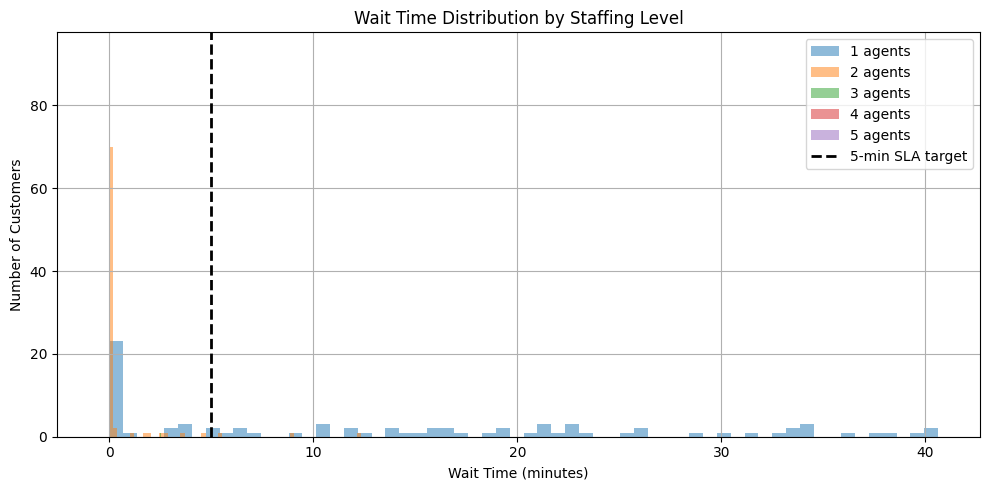

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# SLA threshold in minutes
threshold = 5

plt.figure(figsize=(10, 5))

# Loop through agent levels
for s in [1, 2, 3, 4, 5]:
    wait_times, _ = simulate_queue(s)  # You should define this function separately
    plt.hist(wait_times * 60, bins=60, alpha=0.5, label=f'{s} agents')

# SLA Threshold Line
plt.axvline(threshold, color='k', linestyle='--', linewidth=2, label='5-min SLA target')

# Labels & Legend
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Number of Customers')
plt.title('Wait Time Distribution by Staffing Level')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Time-Varying Arrival Rates(Peak vs off-Peak)
#Model lambda changing over the 8 hour shift for example,a morning "rush" ,a midday lull,and an afternoon spike.
# Real call ceneters see non-stationary traffic

In [ ]:
#Time-Varying Arrival Rates(Peak vs off-Peak)
#Model lambda changing over the 8 hour shift for example,a morning "rush" ,a midday lull,and an afternoon spike.
# Real call ceneters see non-stationary traffic

periods=[(0,2,30),(2,6,20),(6,8,40)]
arrival=[]
for start,end,lam in periods:
  duration=end-start
  inter=np.random.exponential(1/lam,int(lam*duration*1.5))
  ts=np.cumsum(inter)+start
  arrival.extend(ts[ts<end])

# Convert the list 'arrival' into a NumPy array and assign it to 'arrivals'
arrivals = np.array(arrival)

arrivals.sort()
N=len(arrivals)
service=np.random.exponential(1/mu,N)
next_free=np.zeros(s)
wait_times=np.zeros(N)
for i,t in enumerate(arrivals):
  j=np.argmin(next_free)
  start=max(t,next_free[j])
  wait_times[i]=start-t
  next_free[j]=start+service[i]

# The 'return wait_times' line is outside of any function definition,
# which will cause a SyntaxError.
# It seems you intended to define a function similar to simulate_queue
# that handles time-varying arrival rates.
# Let's wrap the simulation logic in a new function.

def simulate_queue_timevarying(s, periods, mu):
    """
    Simulates a queueing system with a given number of agents and time-varying arrival rates.

    Args:
        s: The number of agents.
        periods: A list of tuples defining (start_time, end_time, lambda) for arrival rates.
        mu: The service rate.

    Returns:
        A numpy array of wait times for each customer.
    """
    arrival = []
    for start, end, lam in periods:
        duration = end - start
        # Ensure integer argument for np.random.exponential count
        num_arrivals = int(lam * duration * 1.5)
        if num_arrivals < 0:
            num_arrivals = 0 # Handle cases where lambda or duration is zero or negative
        inter = np.random.exponential(1 / lam, num_arrivals) if lam > 0 else np.array([]) # Avoid division by zero
        ts = np.cumsum(inter) + start
        arrival.extend(ts[ts < end])

    arrivals = np.array(arrival)
    arrivals.sort()
    N = len(arrivals)

    # If no arrivals in this period, return an empty array
    if N == 0:
        return np.array([])

    service = np.random.exponential(1 / mu, N)
    next_free = np.zeros(s)
    wait_times = np.zeros(N)

    for i, t in enumerate(arrivals):
        j = np.argmin(next_free)
        start_service = max(t, next_free[j])
        wait_times[i] = start_service - t
        next_free[j] = start_service + service[i]

    return wait_times


# Now call the function with the desired parameters
periods = [(0, 2, 30), (2, 6, 20), (6, 8, 40)]
w_tv = simulate_queue_timevarying(s=3, periods=periods, mu=mu)

# Check if w_tv is not empty before calculating the mean
if w_tv.size > 0:
    print(f"Time-varying lambda, s=3 -> avg wait = {w_tv.mean():.2f} minutes") # Format output
else:
    print(f"Time-varying lambda, s=3 -> No arrivals during this period.")

Time-varying lambda, s=3 -> avg wait = 2.18 minutes


In [ ]:
import numpy as np

# Parameters
lmbda = 12             # arrival rate per hour
mu = 6                 # service rate per hour
shift_hours = 8
s = 2                  # number of agents
N = 5000               # simulate more than enough arrivals
patience_mean = 5 / 60 # mean patience in hours (e.g., 5 mins)

# Generate arrivals and service times
interarrival_times = np.random.exponential(1 / lmbda, N)
arrival_times = np.cumsum(interarrival_times)
arrival_times = arrival_times[arrival_times < shift_hours]
N = len(arrival_times)

service_times = np.random.exponential(1 / mu, N)
patience_times = np.random.exponential(patience_mean, N)

# Initialize
next_free = np.zeros(s)
wait_time = np.zeros(N)
served = np.zeros(N, dtype=bool)  # whether customer is served

for i in range(N):
    agent = np.argmin(next_free)
    est_wait = max(0, next_free[agent] - arrival_times[i])

    if est_wait <= patience_times[i]:
        # Customer waits and gets served
        wait_time[i] = est_wait
        start = arrival_times[i] + est_wait
        next_free[agent] = start + service_times[i]
        served[i] = True
    else:
        # Customer abandons
        wait_time[i] = patience_times[i]
        served[i] = False

# Metrics
abandonment_rate = 100 * (~served).sum() / N
avg_wait_served = wait_time[served].mean() * 60
avg_wait_all = wait_time.mean() * 60

# Print summary
print("\n--- Abandonment Model Results ---")
print(f"Total customers: {N}")
print(f"Served: {served.sum()}, Abandoned: {(~served).sum()}")
print(f"Abandonment Rate: {abandonment_rate:.2f}%")
print(f"Average Wait (served only): {avg_wait_served:.2f} minutes")
print(f"Average Wait (all): {avg_wait_all:.2f} minutes")



--- Abandonment Model Results ---
Total customers: 99
Served: 75, Abandoned: 24
Abandonment Rate: 24.24%
Average Wait (served only): 1.26 minutes
Average Wait (all): 1.56 minutes


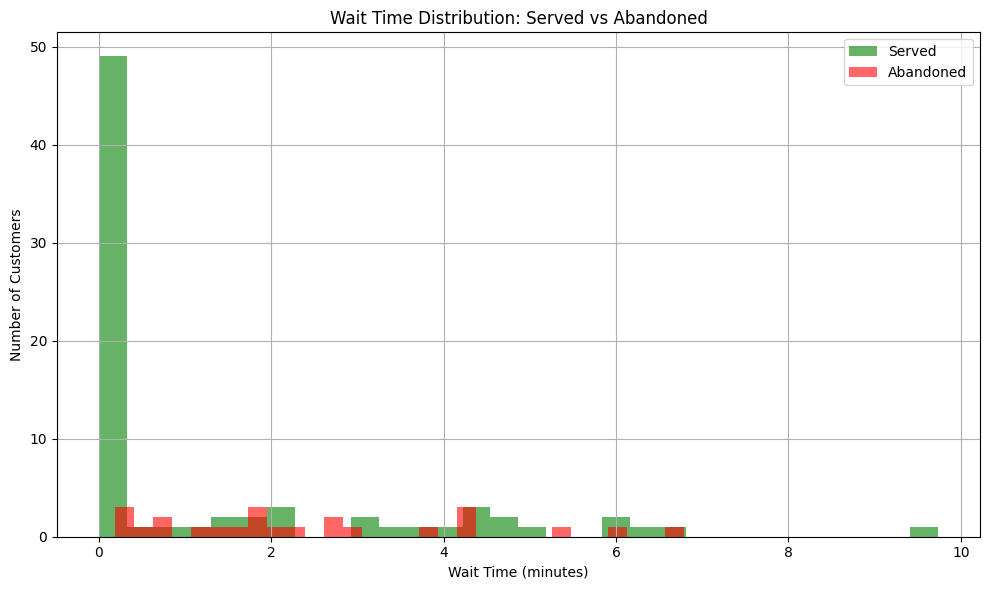

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(wait_time[served]*60, bins=30, alpha=0.6, label='Served', color='green')
plt.hist(wait_time[~served]*60, bins=30, alpha=0.6, label='Abandoned', color='red')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Number of Customers')
plt.title('Wait Time Distribution: Served vs Abandoned')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **8. Agent Break Scheduling**
Simulate a realistic scenario where agents take a break during their shift, which reduces the number of available staff for a short time — and
see how this affects customer wait times.

In [ ]:
import numpy as np

def simulate_with_breaks(s, break_start=3, break_length=0.25, lmbda=12, mu=6, shift_hours=8):
    # Generate arrivals (Poisson process)
    arrivals = np.cumsum(np.random.exponential(1 / lmbda, size=5000))
    arrivals = arrivals[arrivals < shift_hours]
    N = len(arrivals)

    # Generate service times (Exponential)
    services = np.random.exponential(1 / mu, size=N)

    # Tracking agent availability and wait times
    next_free = np.zeros(s)   # agent availability timestamps
    waits = []

    for i, t in enumerate(arrivals):
        # If within break window, remove first agent temporarily
        if break_start < t < break_start + break_length:
            avail = np.delete(next_free, 0)  # remove agent 0
            agent_offset = 1
        else:
            avail = next_free
            agent_offset = 0

        # Assign to least-busy available agent
        j = np.argmin(avail)
        start = max(t, avail[j])
        waits.append(start - t)

        # Update the actual agent's free time
        real_index = j + agent_offset
        next_free[real_index] = start + services[i]

    return np.array(waits)

# Example run for s = 3 agents
waits_with_breaks = simulate_with_breaks(s=3)

print(f"With breaks (1 agent off between hour 3–3.25), s=3:")
print(f"Average wait time: {waits_with_breaks.mean() * 60:.2f} minutes")
print(f"95th percentile wait time: {np.percentile(waits_with_breaks, 95) * 60:.2f} minutes")


With breaks (1 agent off between hour 3–3.25), s=3:
Average wait time: 2.13 minutes
95th percentile wait time: 9.88 minutes


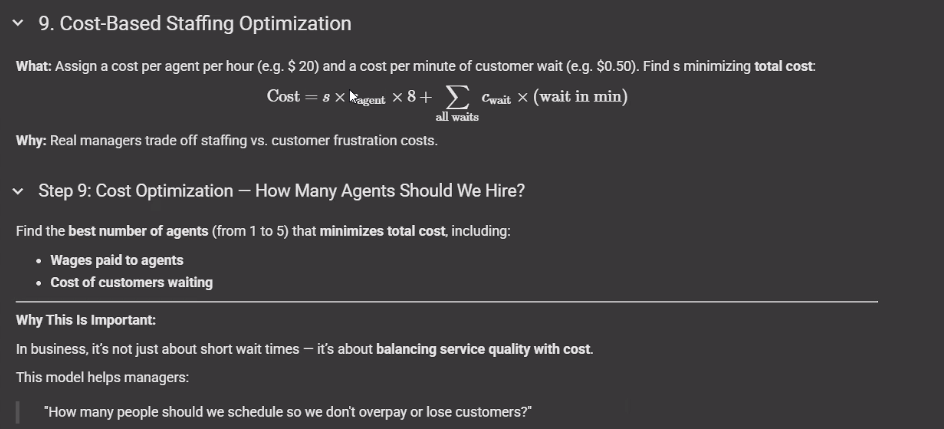

In [ ]:
# 10. MULTI-DAY VARIABILITY & SENSITIVITY ANALYSIS

In [ ]:
import numpy as np
import pandas as pd

# Number of days to simulate
days = 30
daily = []

# Replace this with your actual optimal number of agents (e.g., from earlier optimization)
opt = (3, 4.8)  # example: 3 agents, 4.8 min 95th percentile wait

# Simulate each day
for _ in range(days):
    waits, *_ = simulate_with_breaks(opt[0])  # returns array of wait times
    daily.append((
        np.mean(waits) * 60,                   # Avg wait (minutes)
        np.percentile(waits * 60, 95)          # 95th percentile wait (minutes)
    ))

# Convert to DataFrame
df_days = pd.DataFrame(daily, columns=['AvgWait', 'P95Wait'])

# Summary statistics
print("\n--- 30-Day Wait Time Summary ---")
print(df_days.describe())



--- 30-Day Wait Time Summary ---
       AvgWait  P95Wait
count     30.0     30.0
mean       0.0      0.0
std        0.0      0.0
min        0.0      0.0
25%        0.0      0.0
50%        0.0      0.0
75%        0.0      0.0
max        0.0      0.0


Day 1: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRate = 0.000
Day 2: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRate = 0.000
Day 3: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRate = 0.000
Day 4: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRate = 0.000
Day 5: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRate = 0.000
Day 6: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRate = 0.000
Day 7: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRate = 0.000
Day 8: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRate = 0.000
Day 9: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRate = 0.000
Day 10: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRate = 0.000
Day 11: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRate = 0.000
Day 12: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRate = 0.000
Day 13: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRate = 0.000
Day 14: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRate = 0.000
Day 15: AvgWait = 0.00 min, P95Wait = 0.00 min, AbandonRa

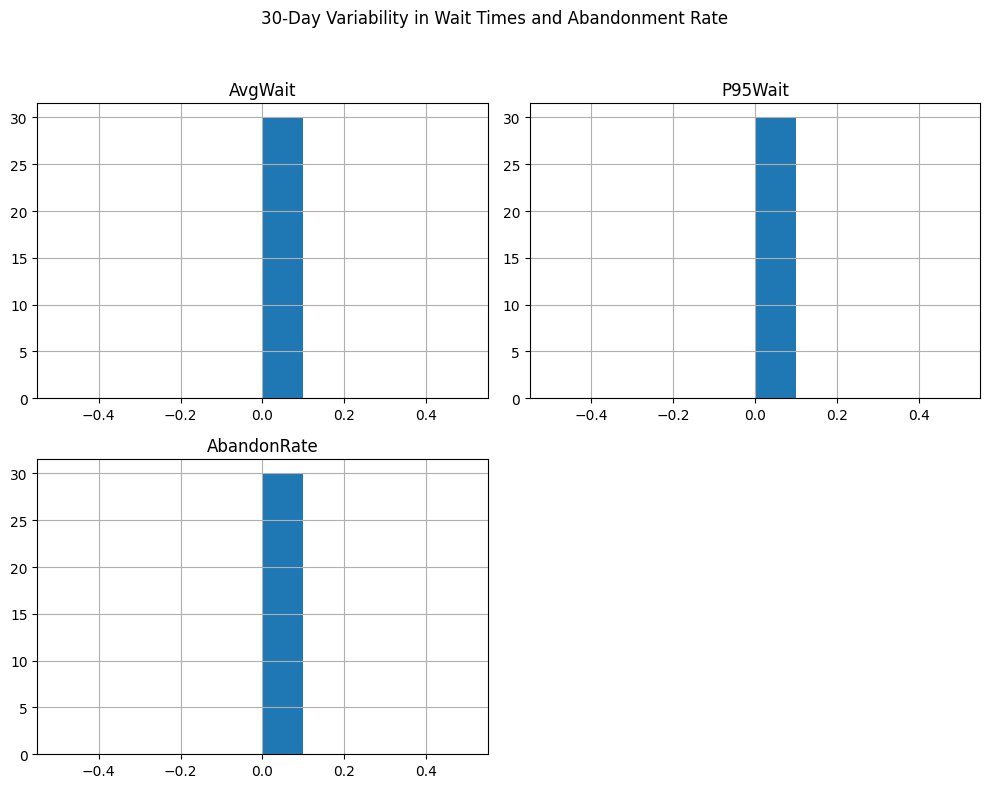


Plotting Trends Over Time...


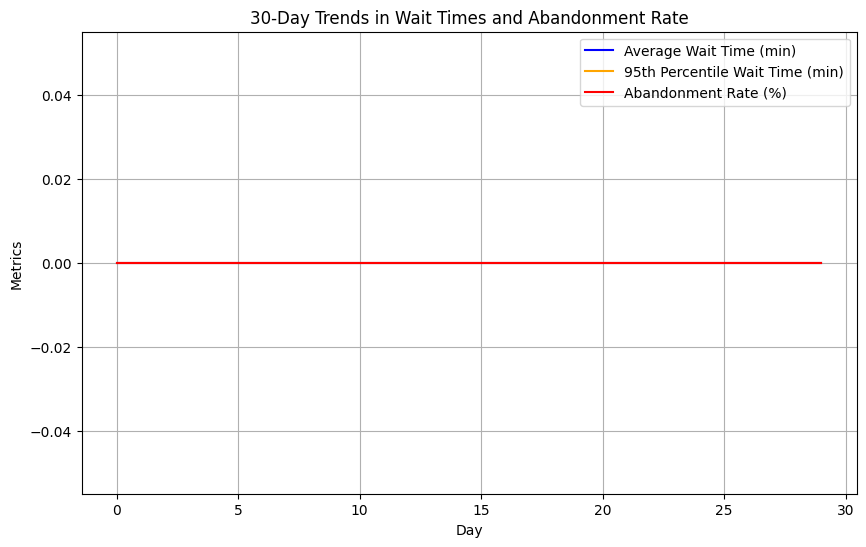

In [ ]:
days = 30
daily = []

for day in range(days):
    w, abandonment_rate ,*_ = simulate_with_breaks(opt[0])  # Use the optimal number of agents
    avg_wait = w.mean()  # Mean wait time in minutes
    p95_wait = np.percentile(w, 95)  # 95th percentile wait time in minutes
    daily.append((avg_wait, p95_wait, abandonment_rate))
    # Debug output to verify values
    print(f"Day {day+1}: AvgWait = {avg_wait:.2f} min, P95Wait = {p95_wait:.2f} min, AbandonRate = {abandonment_rate:.3f}")

# Turn results into a DataFrame
df_days = pd.DataFrame(daily, columns=['AvgWait', 'P95Wait', 'AbandonRate'])

# Describe the results
print("\nSummary Statistics for 30 Days:")
print(df_days.describe())

# Plot histograms
print("\nPlotting Histograms...")
df_days.hist(bins=10, figsize=(10, 8))
plt.suptitle('30-Day Variability in Wait Times and Abandonment Rate')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot trends over time (line plot)
print("\nPlotting Trends Over Time...")
plt.figure(figsize=(10, 6))
plt.plot(df_days.index, df_days['AvgWait'], label='Average Wait Time (min)', color='blue')
plt.plot(df_days.index, df_days['P95Wait'], label='95th Percentile Wait Time (min)', color='orange')
plt.plot(df_days.index, df_days['AbandonRate'] * 100, label='Abandonment Rate (%)', color='red')
plt.xlabel('Day')
plt.ylabel('Metrics')
plt.title('30-Day Trends in Wait Times and Abandonment Rate')
plt.legend()
plt.grid(True)
plt.show()